In [11]:
import numpy as np
import tensorflow as tf
from edward.models import Normal
import edward as ed
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def build_toy_dataset(N, w, noise_std=0.1):
  D = len(w)
  x = np.random.randn(N, D)
  y = np.dot(x, w) + np.random.normal(0, noise_std, size=N)
  return x, y

N = 40  # number of data points
D = 10  # number of features

w_true = np.random.randn(D)
X_train, y_train = build_toy_dataset(N, w_true)
X_test, y_test = build_toy_dataset(N, w_true)

In [6]:
X = tf.placeholder(tf.float32, [N, D])
w = Normal(mu=tf.zeros(D), sigma=tf.ones(D))
b = Normal(mu=tf.zeros(1), sigma=tf.ones(1))
y = Normal(mu=ed.dot(X, w) + b, sigma=tf.ones(N))

In [7]:
qw = Normal(mu=tf.Variable(tf.random_normal([D])),
            sigma=tf.nn.softplus(tf.Variable(tf.random_normal([D]))))
qb = Normal(mu=tf.Variable(tf.random_normal([1])),
            sigma=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))

In [8]:
inference = ed.KLqp({w: qw, b: qb}, data={X: X_train, y: y_train})
inference.run(n_samples=5, n_iter=250)

Iteration   1 [  0%]: Loss = 510.198
Iteration  25 [ 10%]: Loss = 77.018
Iteration  50 [ 20%]: Loss = 60.631
Iteration  75 [ 30%]: Loss = 61.767
Iteration 100 [ 40%]: Loss = 59.794
Iteration 125 [ 50%]: Loss = 59.856
Iteration 150 [ 60%]: Loss = 59.953
Iteration 175 [ 70%]: Loss = 58.999
Iteration 200 [ 80%]: Loss = 60.209
Iteration 225 [ 90%]: Loss = 61.159
Iteration 250 [100%]: Loss = 60.342


In [9]:
def visualise(X_data, y_data, w, b, n_samples=10):
  w_samples = w.sample(n_samples)[0].eval()
  b_samples = b.sample(n_samples).eval()
  plt.scatter(X_data[:, 0], y_data)
  plt.ylim([-10, 10])
  inputs = np.linspace(-8, 8, num=400)
  for ns in range(n_samples):
    output = inputs * w_samples[ns] + b_samples[ns]
    plt.plot(inputs, output)

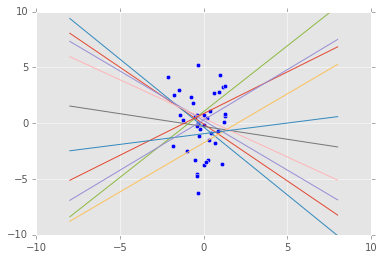

In [14]:
# Visualize samples from the prior.
visualise(X_train, y_train, w, b)

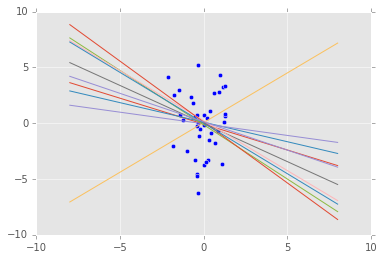

In [19]:
# Visualize samples from the posterior.
visualise(X_train, y_train, qw, qb)